In [1]:
import scanpy as sc
import scFates as scf
import scvelo as scv
adata=sc.read("adata_processed.h5ad")

In [2]:
adata=adata[(adata.obs.leiden.isin(["0","2"])) & (adata.obs.location=="Dorsal root ganglion")]

Trying to set attribute `.var` of view, copying.


Finding overdispersed features
    computing mean and variances
    gam fitting
    found 54 over-dispersed features (0:00:00) --> added 
    .var['res'], residuals of GAM fit.
    .var['lp'], p-value.
    .var['lpa'], BH adjusted p-value.
    .var['qv'], percentile of qui-squared distribution.
    .var['highly_variable'], feature is over-dispersed.



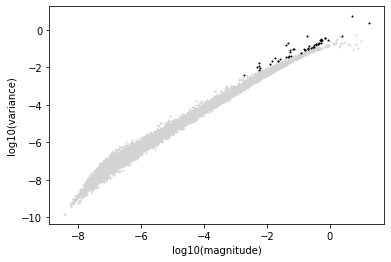

In [3]:
sc.pp.filter_genes(adata,min_cells=3)
scf.pp.find_overdispersed(adata,plot=True)

In [4]:
adata.obsm["X_pca"]=sc.pp.pca(sc.pp.scale(adata[:,adata.var.highly_variable].X.copy(),max_value=10))
sc.pp.neighbors(adata,method="rapids",n_pcs=20,n_neighbors=30)
sc.tl.umap(adata,method="rapids")


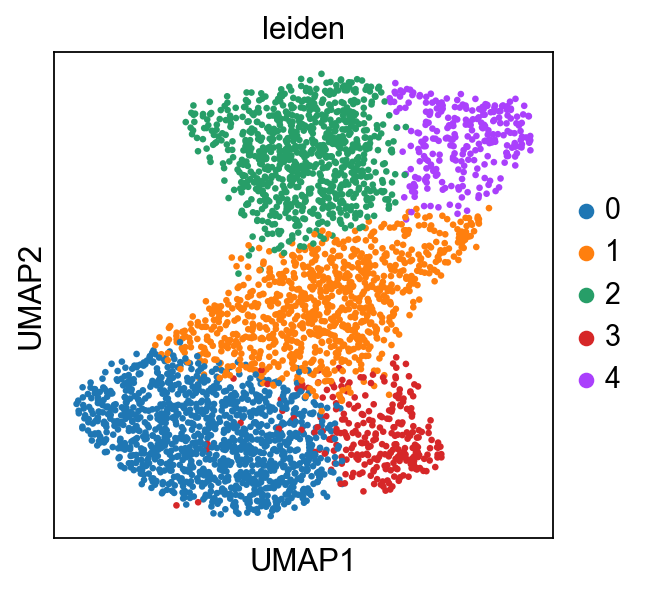

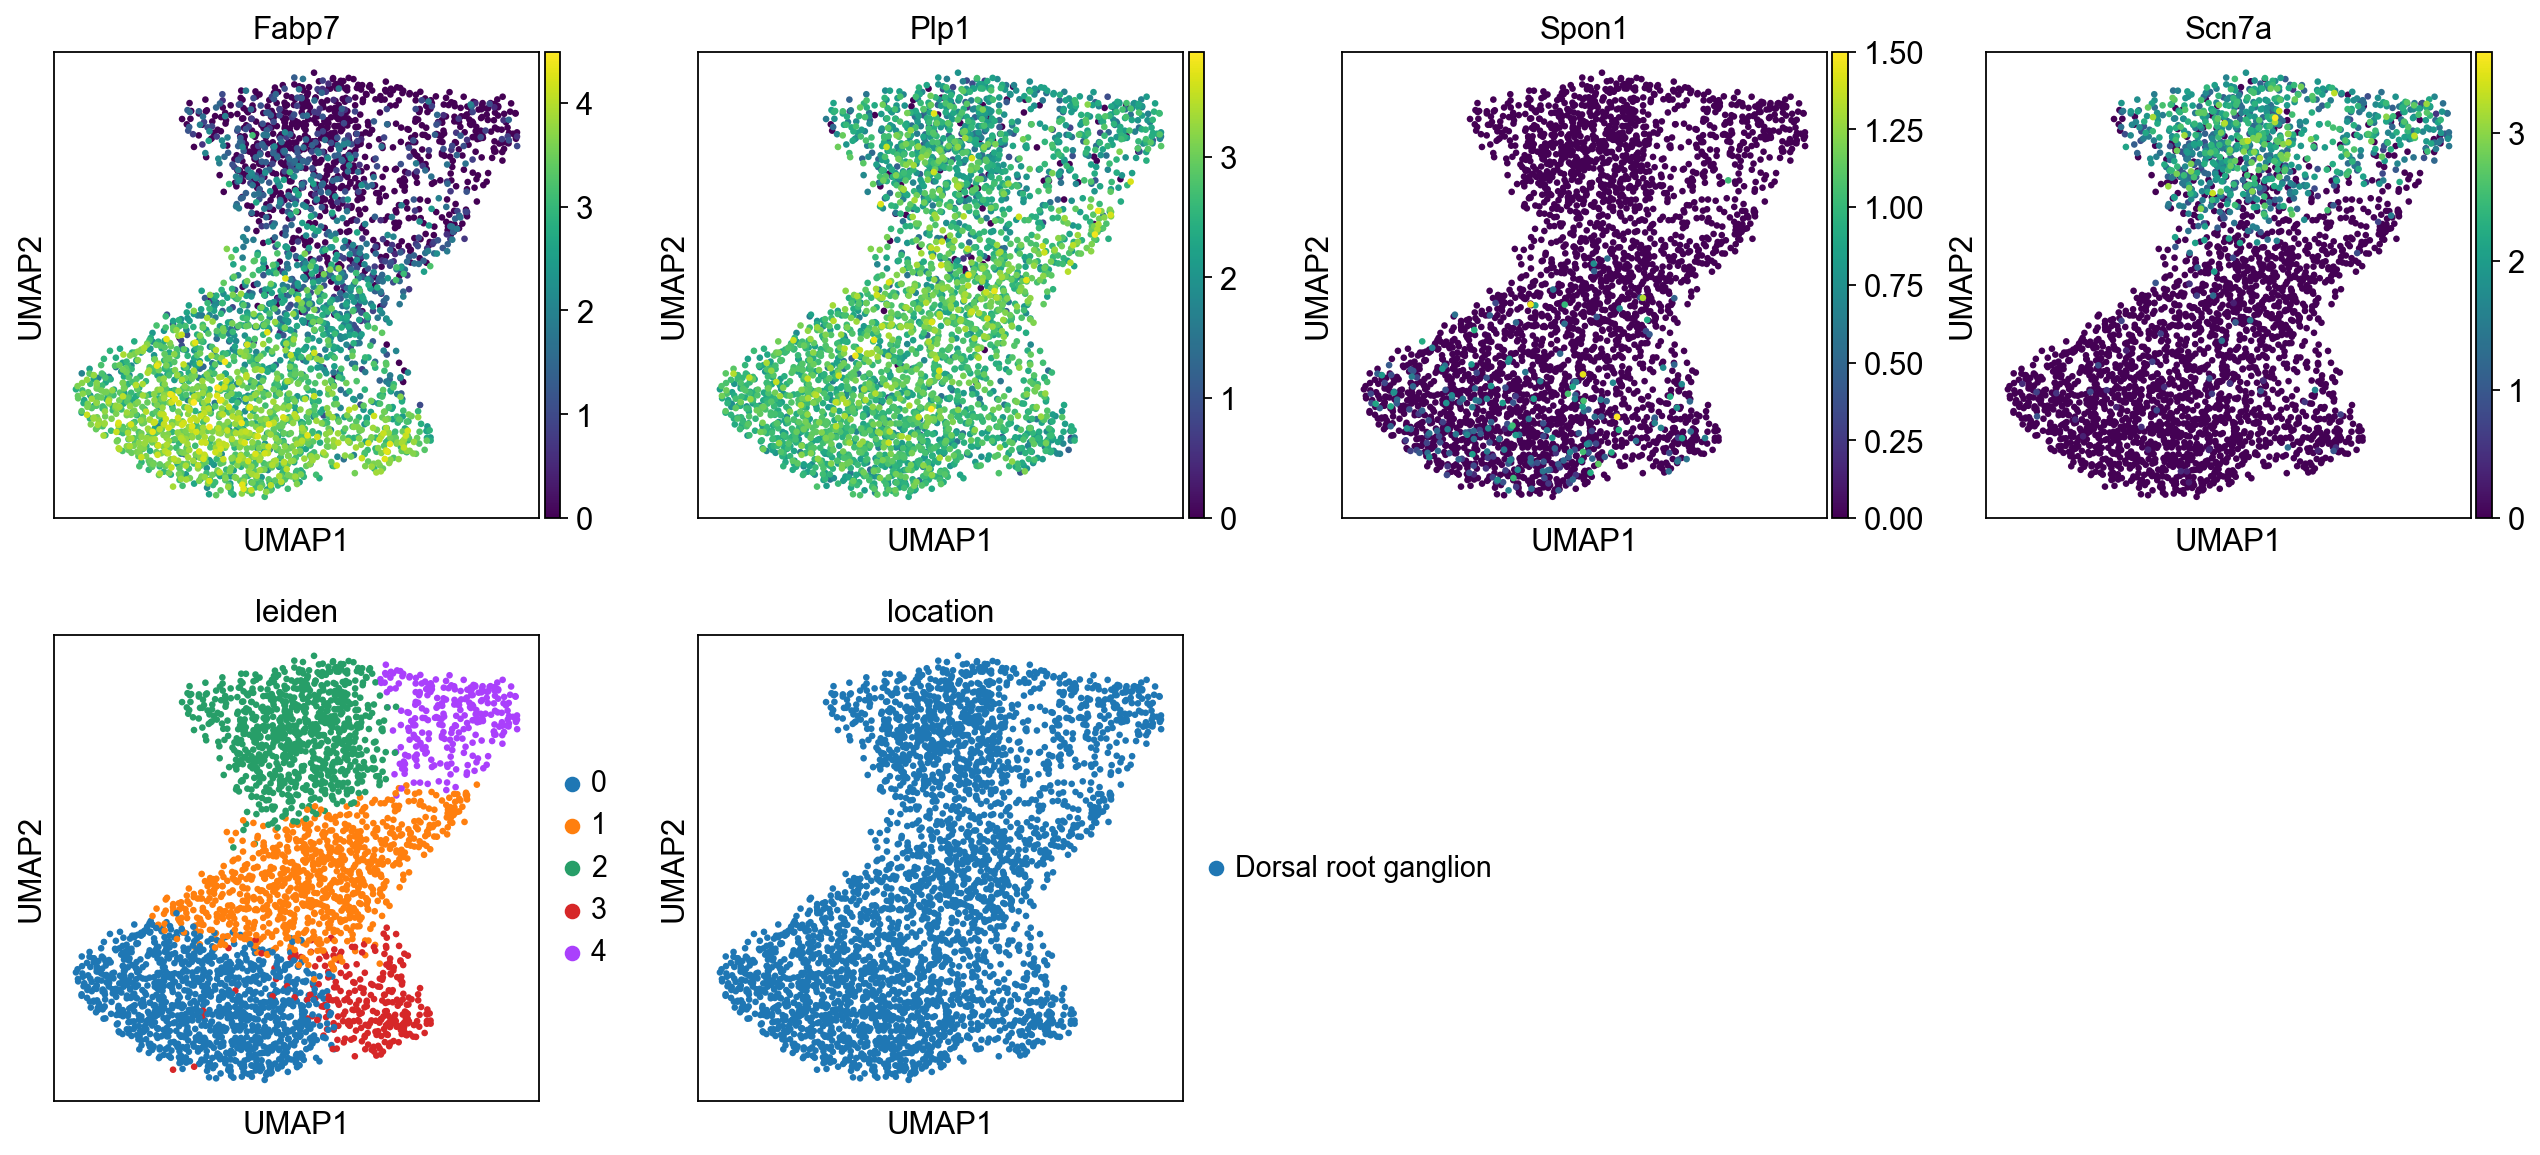

In [5]:
sc.set_figure_params()
sc.tl.leiden(adata,resolution=.8)
sc.pl.umap(adata,color=["leiden"],use_raw=False)
sc.pl.umap(adata,color=["Fabp7","Plp1","Spon1","Scn7a","leiden","location"],use_raw=False)

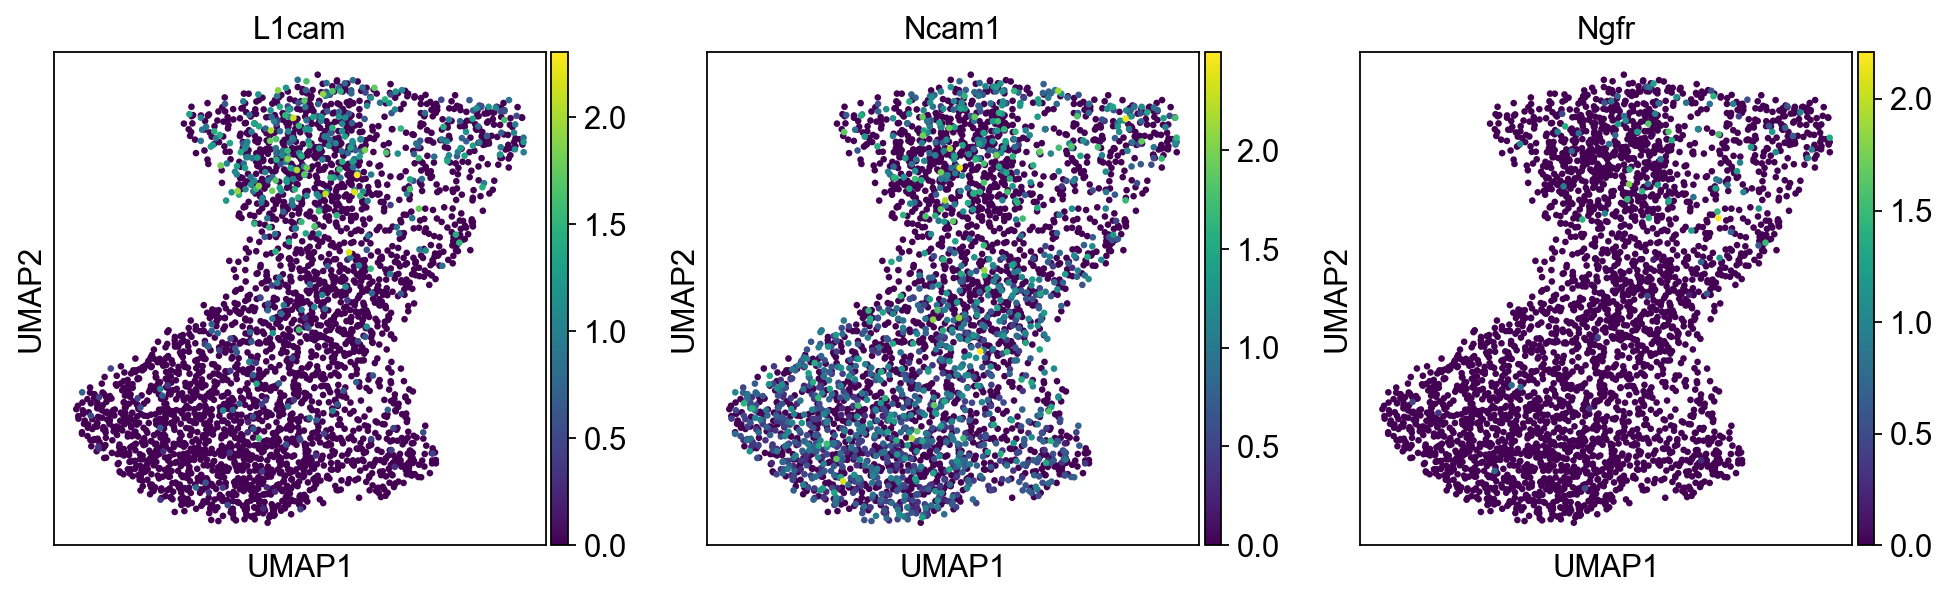

In [6]:
sc.pl.umap(adata,color=["L1cam","Ncam1","Ngfr"],use_raw=False)

In [7]:
sc.tl.rank_genes_groups(adata,"leiden",method="wilcoxon")

In [8]:
adata.layers["scaled"]=sc.pp.scale(adata.X,copy=True)

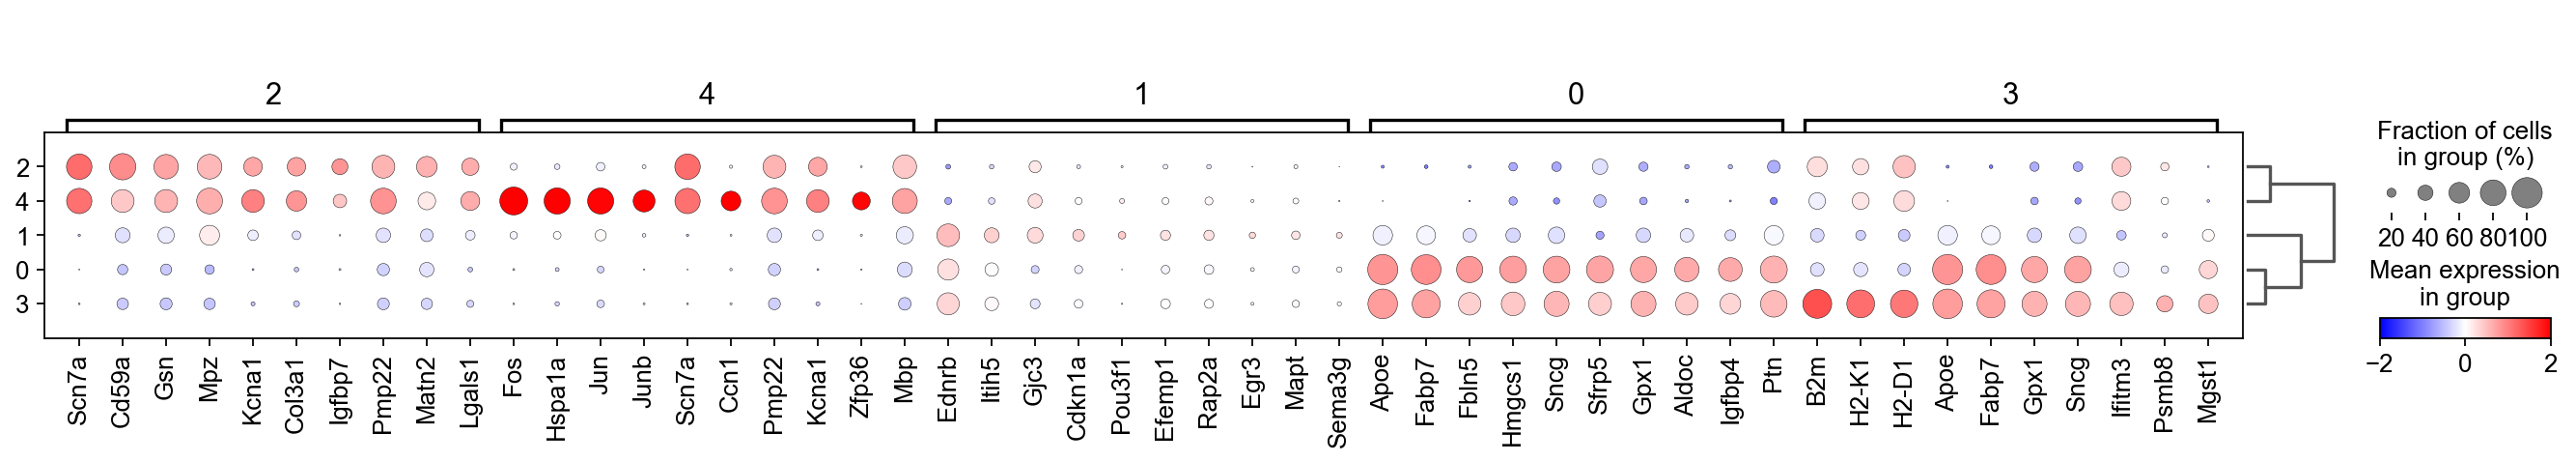

In [9]:
sc.pl.rank_genes_groups_dotplot(adata,layer="scaled",cmap="bwr",vmin=-2,vmax=2,min_logfoldchange=1)

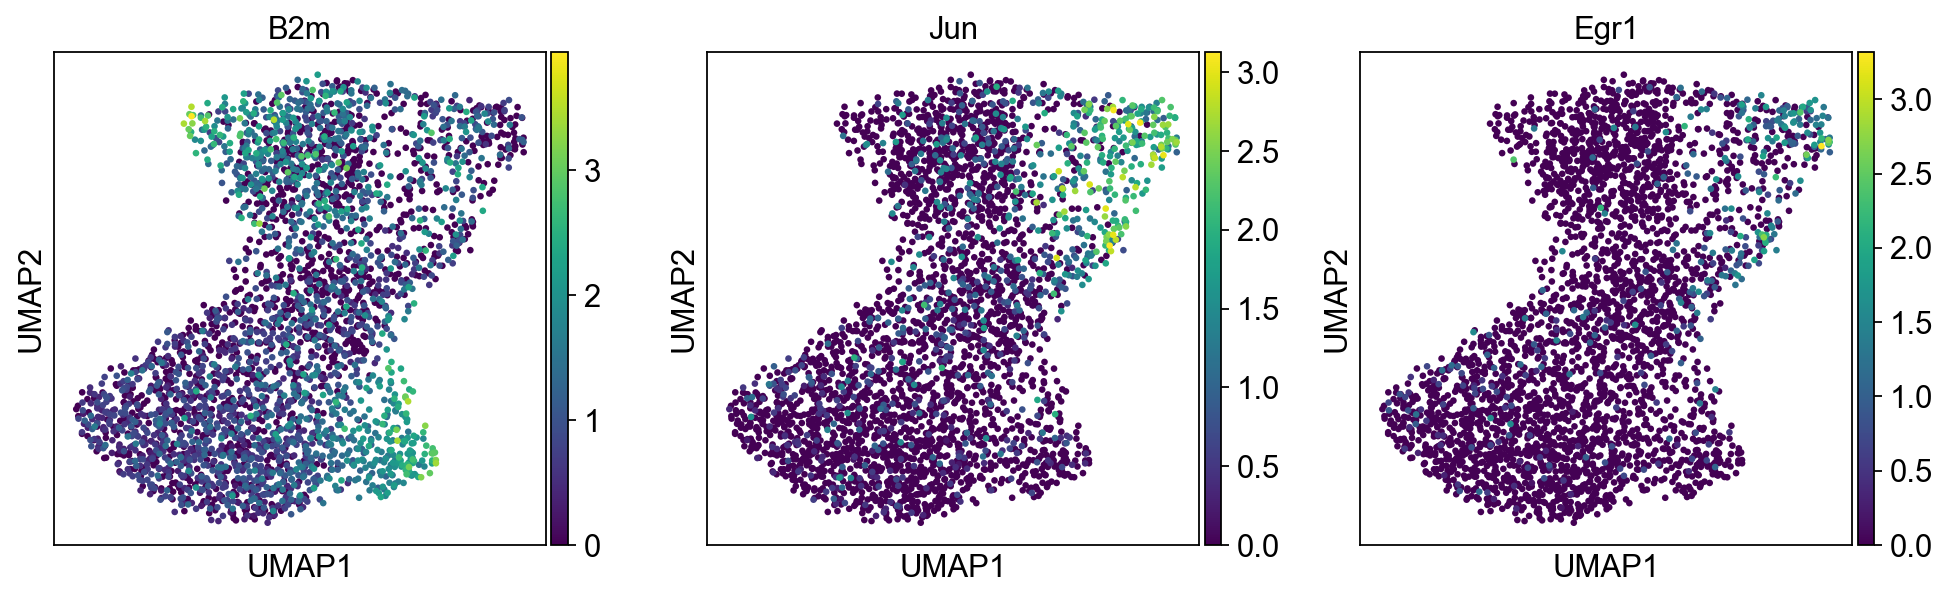

In [10]:
sc.pl.umap(adata,color=["B2m","Jun","Egr1"],use_raw=False)

In [11]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 11030 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/88 cores)


  0%|          | 0/3374 [00:00<?, ?cells/s]

    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


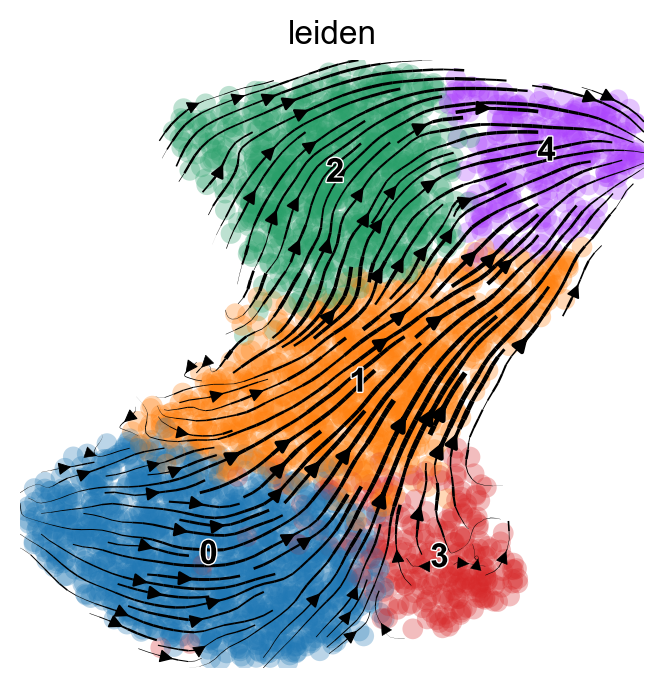

In [12]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)
scv.set_figure_params('scvelo',figsize=(4,4)) 
scv.pl.velocity_embedding_stream(adata, basis='umap',color="leiden")

In [13]:
scv.tl.recover_dynamics(adata,n_jobs=80)

recovering dynamics (using 80/88 cores)


  0%|          | 0/453 [00:00<?, ?gene/s]

    finished (0:00:27) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/88 cores)


  0%|          | 0/3374 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


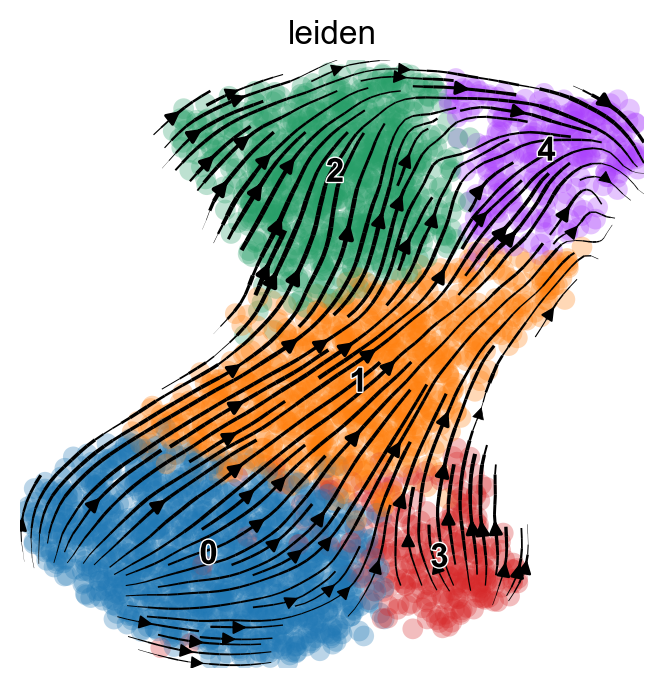

In [14]:
scv.tl.velocity(adata,mode="dynamical")
scv.tl.velocity_graph(adata)
scv.set_figure_params('scvelo',figsize=(4,4)) 
scv.pl.velocity_embedding_stream(adata, basis='umap',color="leiden")

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


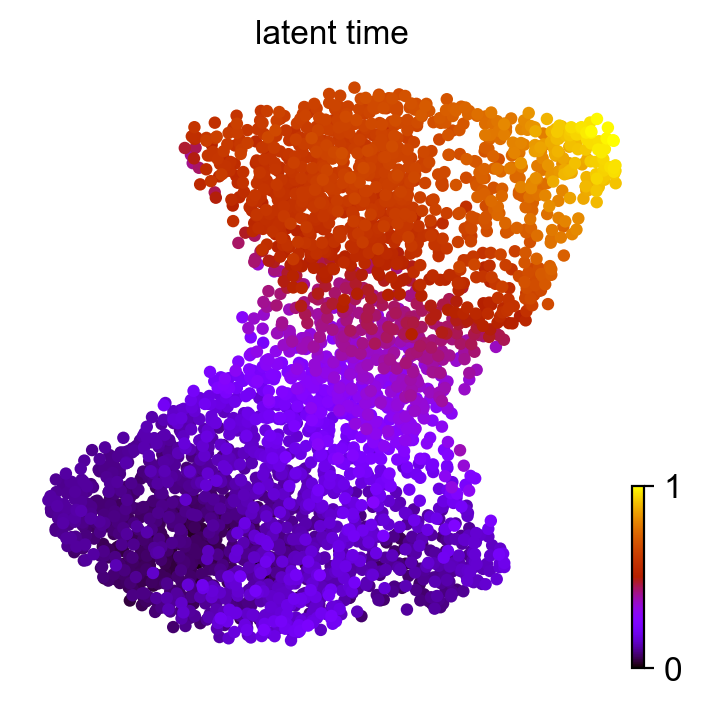

In [15]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

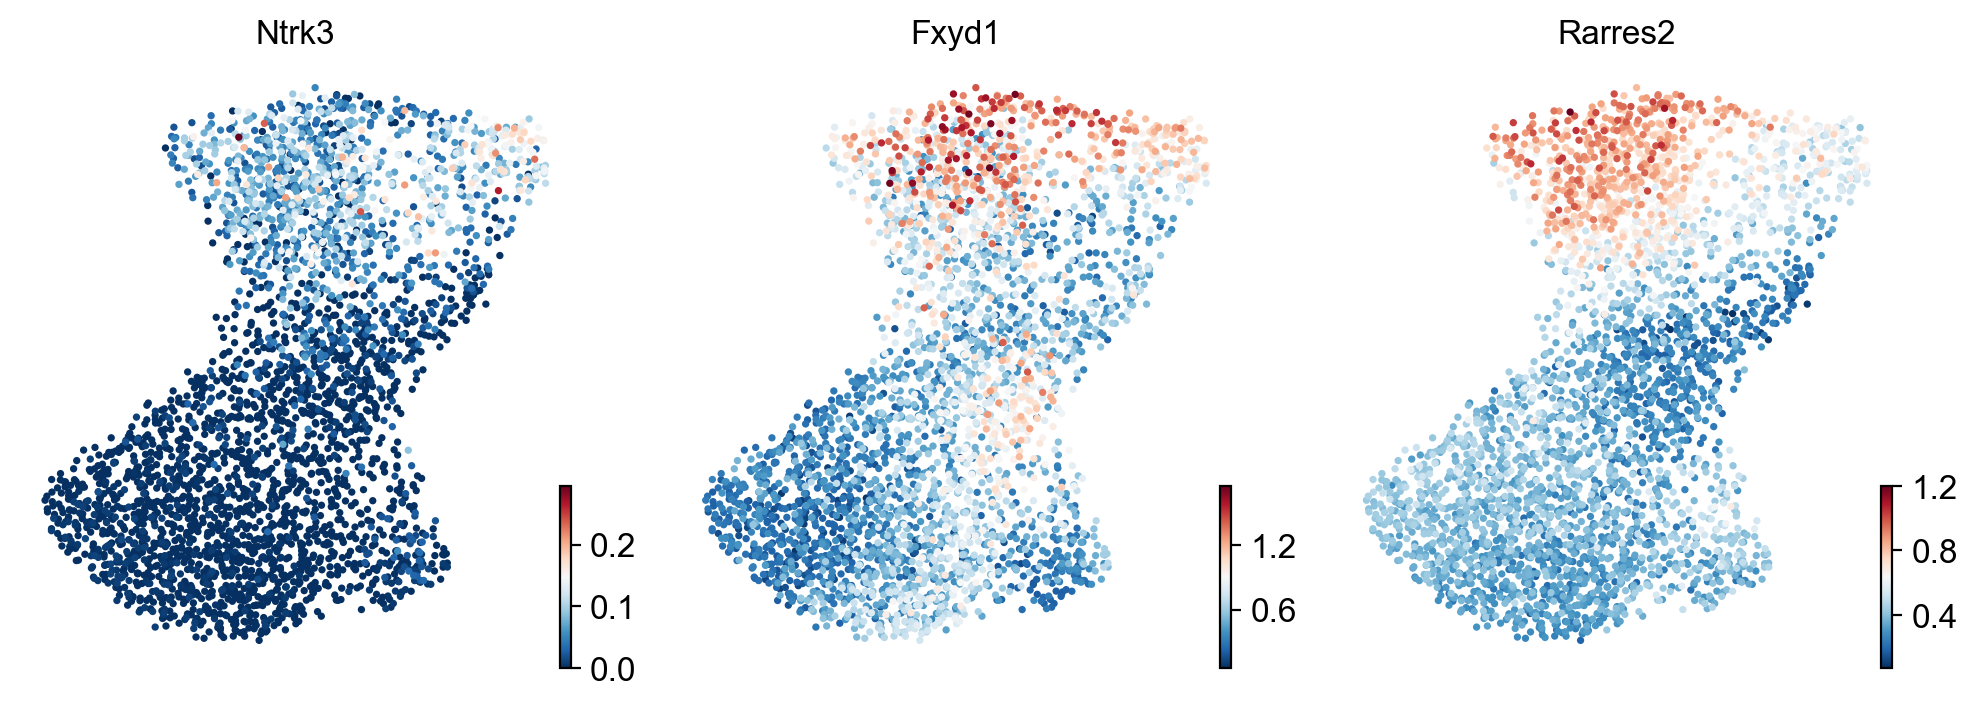

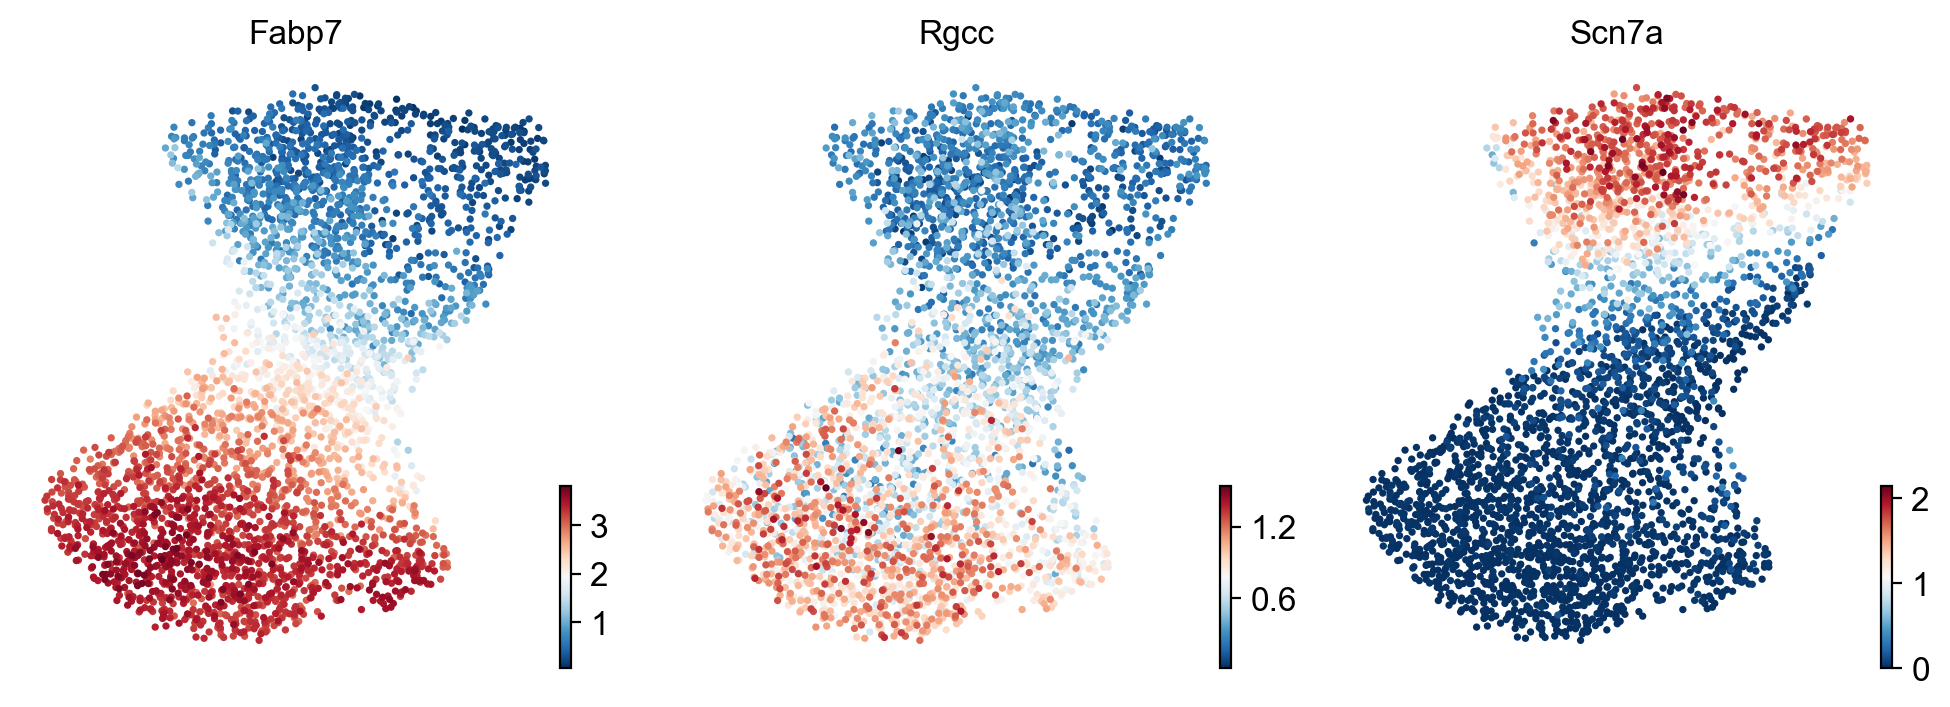

In [16]:
scv.pl.umap(adata,color=["Ntrk3","Fxyd1","Rarres2"],smooth=True)
scv.pl.umap(adata,color=["Fabp7","Rgcc","Scn7a"],smooth=True)

In [17]:
adata.obs["annotations"]=adata.obs.leiden.cat.rename_categories(["Fabp7+","transitory","nmSC-like","Fabp7+/B2m+","Fos/Jun activated"])

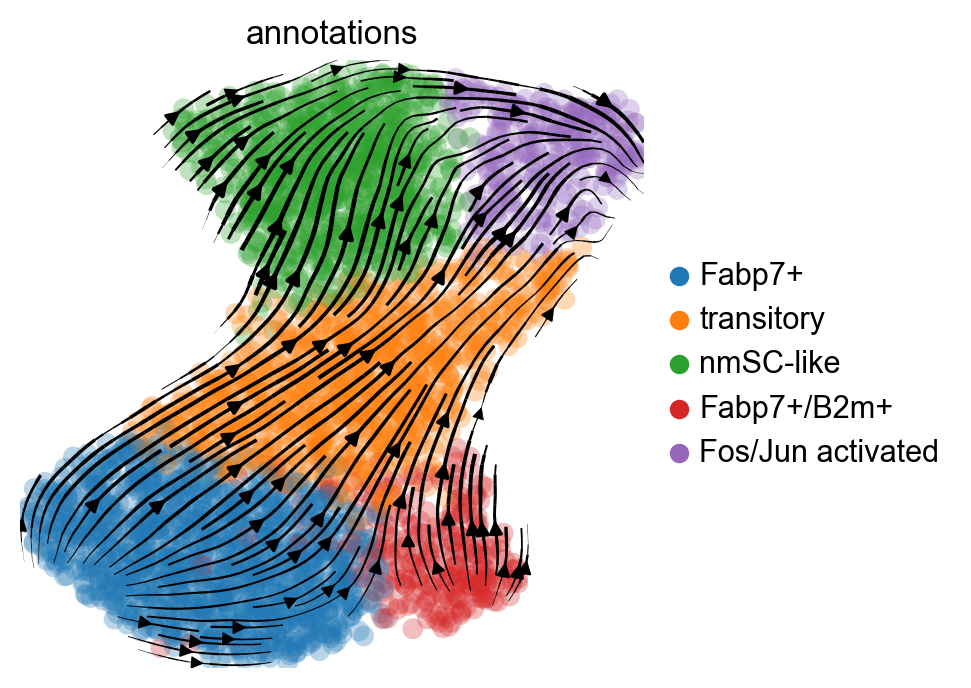

In [18]:
scv.pl.velocity_embedding_stream(adata, basis='umap',color="annotations",legend_loc="right")

In [21]:
adata.write("adata_satglia.h5ad")